## MEI Events

Want to create a list of months that qualify as an El Niño event under the [MEI](http://www.esrl.noaa.gov/psd/enso/mei/) index.

### Set environment

Load all needed libraries and data from previous sessions. 

In [1]:
#--- Libraries
import pandas as pd               # packages for statistics
import numpy as np                # packages for linear algebra

import matplotlib.pyplot as plt   # packages for plotting
import matplotlib as mpl          # packages for plot prefrences
import seaborn as sns             # additional plotting packages

# show figures within notebook
%matplotlib inline                
plt.xkcd()

/home/tristan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#--- Data
enso = pd.read_pickle('data/enso_indices.pkl')

### Indentify El Niño events

The ENSO indices are scaled by variability so that values indicate how the recorded levels feel within the expected range of variability. Here, will consider any value $ > 1$ to be 'on the high side' of the typical range of states, and as such will consider it an El Niño event. This is a fairly common designation, but it is still a subjective choice, and could be arguably replaced with a different value (and a different result). 

In [3]:
#--- Select dates
# select days above the 1sigma level
mei_elnino_dates = enso.index[enso.mei > 1]
# save dates
pd.to_pickle(mei_elnino_dates,'data/mei_elnino_dates.pkl')

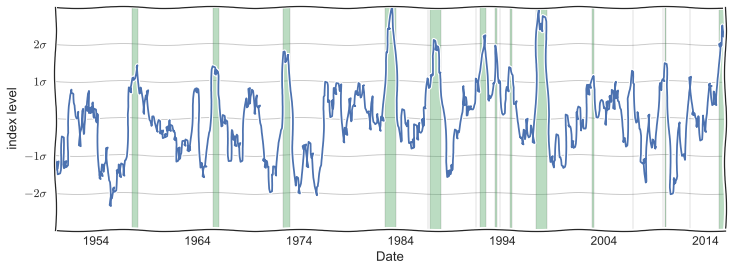

In [4]:
#--- View levels
# increase font size
sns.set(font_scale=1.2)
# choose background
sns.set_style('white')
# choose color map
sns.set_palette('deep')
cp = sns.color_palette('deep')
# set figure
fig, chart = plt.subplots(1,figsize=(12,4))
# draw time line
_ = chart.plot(enso.index,enso.mei)
# set position of axis labels
_ = chart.set_ylim(-3,3)
_ = chart.set_yticks([-2,-1,0,1,2])
_ = chart.set_yticklabels([r'$-2\sigma$',r'$-1\sigma$','',
                           r'$1\sigma$',r'$2\sigma$'])
_ = chart.set_ylabel('index level')
_ = chart.set_xlabel('Date')
# mark horizontal levels
_ = chart.yaxis.grid(True,linewidth=1)
# highlight El Niño periods
_ = chart.fill_between(enso.index,-3,3,where=enso.mei>1,alpha=0.4,facecolor=cp[1])
# save graphic as file
_ = plt.savefig('figures/mei_elnino_dates.png')